In [2]:
#importing the correct libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency

In [3]:
#loading the dataset and printing the first 5 rows
data = pd.read_csv("AB_NYC_2019.csv")
data.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [4]:
# im assuming that the problem statement is such that we use "availability _365" as the target variable
print(max(data["availability_365"]),min(data["availability_365"]))

365 0


In [5]:
# checking the shape of our original dataset
data.shape

(48895, 16)

In [6]:
# checking the data types of all the variables in the data set
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
id                                48895 non-null int64
name                              48879 non-null object
host_id                           48895 non-null int64
host_name                         48874 non-null object
neighbourhood_group               48895 non-null object
neighbourhood                     48895 non-null object
latitude                          48895 non-null float64
longitude                         48895 non-null float64
room_type                         48895 non-null object
price                             48895 non-null int64
minimum_nights                    48895 non-null int64
number_of_reviews                 48895 non-null int64
last_review                       38843 non-null object
reviews_per_month                 38843 non-null float64
calculated_host_listings_count    48895 non-null int64
availability_365                  48895 non-null int64

In [7]:
#collecting all column names from the data set
cnames = list(data.columns)
cnames

['id',
 'name',
 'host_id',
 'host_name',
 'neighbourhood_group',
 'neighbourhood',
 'latitude',
 'longitude',
 'room_type',
 'price',
 'minimum_nights',
 'number_of_reviews',
 'last_review',
 'reviews_per_month',
 'calculated_host_listings_count',
 'availability_365']

In [8]:
#collecting columns names of respective data types
int_c=[]
float_c =[]
object_c =[]
for i in cnames:
    if data[i].dtype == "int64":
        int_c.append(i)
    if data[i].dtype == "float64":
        float_c.append(i)
    if data[i].dtype == "object":
        object_c.append(i)

In [9]:
print(int_c,float_c,object_c)

['id', 'host_id', 'price', 'minimum_nights', 'number_of_reviews', 'calculated_host_listings_count', 'availability_365'] ['latitude', 'longitude', 'reviews_per_month'] ['name', 'host_name', 'neighbourhood_group', 'neighbourhood', 'room_type', 'last_review']


In [10]:
# we create a data frame, which collects the % of missing values which is missing in respective variables
missing_values = pd.DataFrame(data.isnull().sum())
missing_values = missing_values.reset_index()
missing_values = missing_values.rename(columns = {"index":"variable",0:"percentage"})
missing_values["percentage"] = missing_values["percentage"]/len(data)*100

In [11]:
missing_values

,variable,percentage
0,id,0.000000
1,name,0.032723
2,host_id,0.000000
3,host_name,0.042949
4,neighbourhood_group,0.000000
5,neighbourhood,0.000000
6,latitude,0.000000
7,longitude,0.000000
8,room_type,0.000000
9,price,0.000000


In [12]:
# in the above data frame, we observe that the percentage missing values is less than 30%, hence we try to impute the values for these 

for i in cnames:
    if data[i].dtype == "int64":
        data[i]  = data[i].fillna(data[i].mean())
    if data[i].dtype == "float64":
        data[i]  = data[i].fillna(data[i].mean())
    if data[i].dtype == "object":
        data[i]  = data[i].fillna(data[i].mode()[0])
    

In [13]:
missing_values = pd.DataFrame(data.isnull().sum())
missing_values = missing_values.reset_index()
missing_values = missing_values.rename(columns = {"index":"variable",0:"percentage"})
missing_values["percentage"] = missing_values["percentage"]/len(data)*100

In [14]:
# now we observe that there are no missing values in the data set
missing_values

,variable,percentage
0,id,0.0
1,name,0.0
2,host_id,0.0
3,host_name,0.0
4,neighbourhood_group,0.0
5,neighbourhood,0.0
6,latitude,0.0
7,longitude,0.0
8,room_type,0.0
9,price,0.0


In [15]:
data

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.210000,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.380000,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,2019-06-23,1.373221,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.640000,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.100000,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,2019-06-23,1.373221,2,9
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,2019-06-23,1.373221,2,36
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,2019-06-23,1.373221,1,27
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,2019-06-23,1.373221,6,2


In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

In [17]:
# we now remove outliers present in the dataset
for i in int_c:
    q75 ,  q25  = np.percentile(data.loc[:,i],[75,25])
    iqr         = q75 - q25
    m_in        = q25-iqr*1.5
    m_ax        = q75+iqr*1.5
    print(m_ax,m_in)
    data.drop(data[data[i] <m_in].index,axis=0, inplace = True) 
    data.drop(data[data[i] >m_ax].index,axis=0, inplace = True)

58672528.75 -20048405.25
256853008.0 -141596552.0
334.0 -90.0
11.0 -5.0
73.5 -42.5
3.5 -0.5
261.875 -157.125


In [18]:
# we previously had around 49k rows, now we have reduced it down to 27k rows
data.shape

(27343, 16)

In [19]:
data

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.100000,1,0
10,5295,Beautiful 1br on Upper West Side,7702,Lena,Manhattan,Upper West Side,40.80316,-73.96545,Entire home/apt,135,5,53,2019-06-22,0.430000,1,6
18,7726,Hip Historic Brownstone Apartment with Backyard,20950,Adam And Charity,Brooklyn,Crown Heights,40.67592,-73.94694,Entire home/apt,99,3,53,2019-06-22,4.440000,1,21
19,7750,Huge 2 BR Upper East Cental Park,17985,Sing,Manhattan,East Harlem,40.79685,-73.94872,Entire home/apt,190,7,0,2019-06-23,1.373221,2,249
20,7801,Sweet and Spacious Brooklyn Loft,21207,Chaya,Brooklyn,Williamsburg,40.71842,-73.95718,Entire home/apt,299,3,9,2011-12-28,0.070000,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48889,36484363,QUIT PRIVATE HOUSE,107716952,Michael,Queens,Jamaica,40.69137,-73.80844,Private room,65,1,0,2019-06-23,1.373221,2,163
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,2019-06-23,1.373221,2,9
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,2019-06-23,1.373221,2,36
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,2019-06-23,1.373221,1,27


In [20]:
data_int = data[int_c]

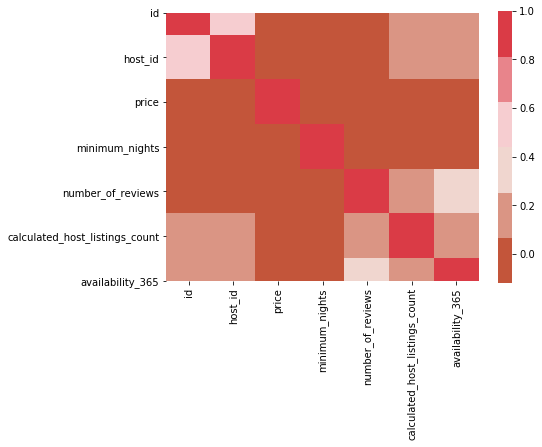

In [21]:
f,ax = plt.subplots(figsize=(7,5))
corr = data_int.corr()

sns.heatmap(corr,mask=np.zeros_like(corr,dtype = np.bool),cmap=sns.diverging_palette(20,10),square=True,ax=ax)

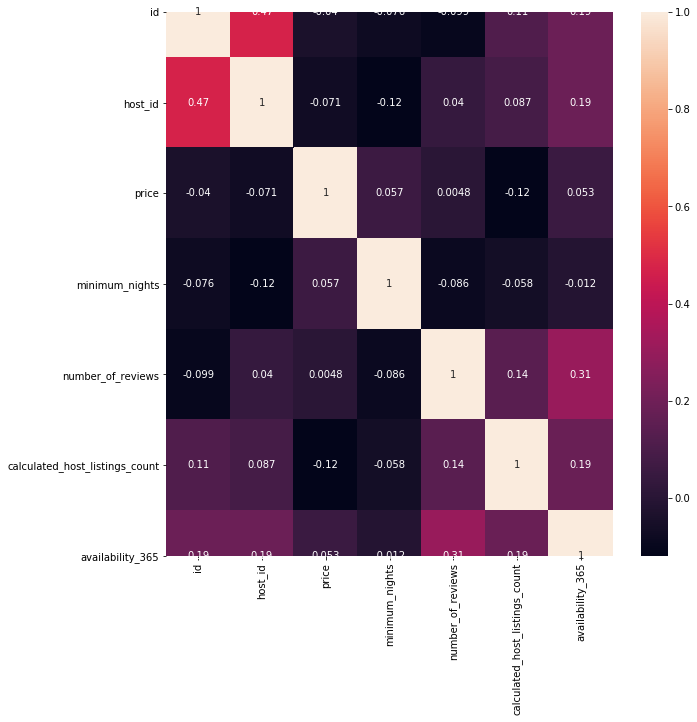

In [22]:
# we create a heat map to see how the different variables are correlated to eachother
f,ax = plt.subplots(figsize=(10,10))
myBasicCorr = data_int.corr()
sns.heatmap(myBasicCorr,annot=True)

In [23]:
data.drop(["id"],axis=1,inplace=True)

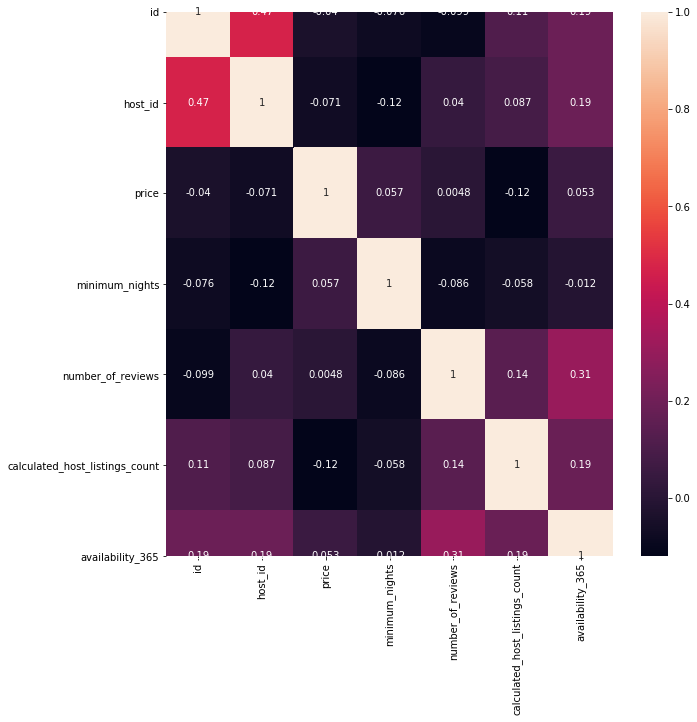

In [24]:
f,ax = plt.subplots(figsize=(10,10))

sns.heatmap(myBasicCorr,annot=True)

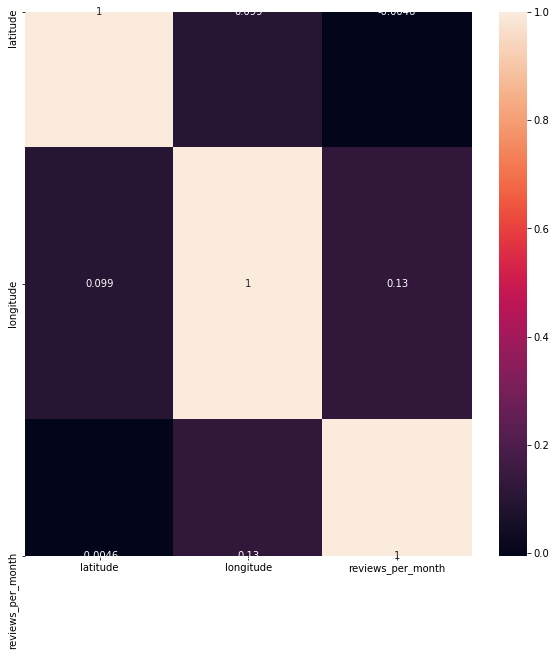

In [25]:
data_float = data[float_c]
f,ax = plt.subplots(figsize=(10,10))
myBasicCorr = data_float.corr()
sns.heatmap(myBasicCorr,annot=True)

In [26]:
from scipy.stats import chi2_contingency

In [27]:
# we apply chi square test in order to see which categorical variables are correlated with eachother
# if the p value is greater than 0.05, we remove the variable
# in this case, the pvalue for last review is 1, hence we remove it
for i in object_c:
    chi2,p,dof,ex = chi2_contingency(pd.crosstab(data["availability_365"],data[i]))
    print(i," \t",p)

name  	 9.003671042720177e-27
host_name  	 0.0
neighbourhood_group  	 1.298814396419433e-134
neighbourhood  	 0.0
room_type  	 1.4536979443307398e-45
last_review  	 1.0


In [28]:
data.drop(["last_review"],axis=1,inplace=True)

In [29]:
# we would also remove the "name" variable since it doesnt provide much information
data.drop(["name"],axis=1,inplace = True)

In [34]:
# we now convert all categorical variables to cat.codes
for i in range(data.shape[1]):
    if data.iloc[:,i].dtype == "object":
        data.iloc[:,i] = pd.Categorical(data.iloc[:,i])
        data.iloc[:,i] = data.iloc[:,i].cat.codes
        data.iloc[:,i] = data.iloc[:,i].astype("object")

In [35]:
data

,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
4,7192,4262,2,60,40.79851,-73.94399,0,80,10,9,0.100000,1,0
10,7702,4329,2,197,40.80316,-73.96545,0,135,5,53,0.430000,1,6
18,20950,56,1,50,40.67592,-73.94694,0,99,3,53,4.440000,1,21
19,17985,6950,2,60,40.79685,-73.94872,0,190,7,0,1.373221,2,249
20,21207,1344,1,209,40.71842,-73.95718,0,299,3,9,0.070000,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
48889,107716952,5144,3,103,40.69137,-73.80844,1,65,1,0,1.373221,2,163
48890,8232441,6494,1,13,40.67853,-73.94995,1,70,2,0,1.373221,2,9
48891,6570630,4882,1,28,40.70184,-73.93317,1,40,4,0,1.373221,2,36
48892,23492952,3077,2,92,40.81475,-73.94867,0,115,10,0,1.373221,1,27
